##Objective- take inital cleaned player df from query and add shooting stats to create final dataset to cluster on. 

1 load cleaned and raw shooting data 

2 clean shooting data

3 merge data and save to drive 

In [ ]:
import pandas as pd
import json
import numpy as np



# Import Drive API and authenticate.
from google.colab import drive

# Mount your Drive to the Colab VM.
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/data/cleaned_player.csv"
df= pd.read_csv(path)

In [ ]:
df.head()

,Unnamed: 0,fb_id,player_name,Squad_from_op,Opposing_Poss,Opposing_Touches,Nation,Position,Nineties,xA,Key_pass,Comp_prog,Total_Cmp,Total_Att,Total_Cmp_pct,Total_Tot_Dist,Total_Prg_Dist,Short_Cmp,Short_Att,Short_Cmp_pct,Medium_Cmp,Medium_Att,Medium_Cmp_pct,Long_Cmp,Long_Att,Long_Cmp_pct,touches,touches_def_box,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_box,touch_live,dribble_Succ,dribble_Att,dribble_Succ_pct,num_dribble_past,dribble_megs,carries,carries_dist,carries_prog_dist,carries_prog,carries_att_3rd,carries_att_box,miss_control,dispossed,recep_targ,recep_succ,recept_pct,Yellow_cards,Red_cards,Second_yellow,Fouls,Fouls_drawn,Offsides,Crosses,def_interceptions,from_mish_tackles_won,PK_won,PK_conceded,OG,Recoveries,Aerial_Duels_lost,Aerial_win_pct
0,0,11c30a46,Carles Gil,New England,49.1,20024,es ESP,MF,25.4,12.0,134,277.0,1240,1669,74.3,25809,9931,444,511,86.9,535,652,82.1,244,451,54.1,1925,7,129,966,1004,102,1671,66,98,67.3,67,8,1438,9798,5239,276,110,29,50,44,1688,1437,85.1,168,0,0,7,76,0,114,23,4,0,0,0,164,4,17.4
1,1,acd47bc0,Julian Gressel,D.C. United,54.0,20526,de GER,DF,29.9,12.2,96,166.0,1116,1732,64.4,24290,10948,415,523,79.3,475,618,76.9,222,530,41.9,2021,58,378,916,834,85,1569,16,37,43.2,17,1,1055,5443,3503,171,38,17,24,25,1300,1091,83.9,113,0,0,35,24,4,144,68,19,0,0,0,251,30,44.8
2,2,614b26e3,Emanuel Reynoso,Minnesota Utd,49.9,20887,ar ARG,MFFW,26.5,8.8,91,234.0,1116,1618,69.0,20799,7764,529,636,83.2,385,522,73.8,174,382,45.5,2162,5,143,1016,1177,83,1948,107,193,55.4,112,17,1668,7466,4081,255,73,14,108,95,1856,1590,85.7,225,1,0,58,107,2,69,27,43,1,0,0,198,18,28.6
3,3,0adeafaa,Albert Rusnák,Real Salt Lake,49.1,19279,sk SVK,MFFW,33.8,7.2,87,145.0,1377,1647,83.6,28368,7668,553,605,91.4,542,596,90.9,263,409,64.3,1894,20,241,995,806,107,1629,28,41,68.3,28,5,1288,7702,3905,210,74,28,37,31,1522,1314,86.3,157,0,0,23,33,1,46,25,16,0,0,0,203,4,12.9
4,4,f99f37fc,Maximiliano Moralez,NYCFC,46.5,19332,ar ARG,MFFW,26.5,9.6,83,205.0,1234,1654,74.6,24667,8427,554,635,87.2,398,505,78.8,255,424,60.1,1977,7,159,1078,840,108,1781,20,32,62.5,21,2,1310,5979,2654,157,45,12,47,53,1830,1473,80.5,225,1,0,45,68,5,70,23,26,0,0,0,167,10,23.3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 64 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             705 non-null    int64  
 1   fb_id                  705 non-null    object 
 2   player_name            705 non-null    object 
 3   Squad_from_op          705 non-null    object 
 4   Opposing_Poss          705 non-null    float64
 5   Opposing_Touches       705 non-null    int64  
 6   Nation                 705 non-null    object 
 7   Position               705 non-null    object 
 8   Nineties               705 non-null    float64
 9   xA                     705 non-null    float64
 10  Key_pass               705 non-null    int64  
 11  Comp_prog              705 non-null    float64
 12  Total_Cmp              705 non-null    int64  
 13  Total_Att              705 non-null    int64  
 14  Total_Cmp_pct          705 non-null    float64
 15  Total_

In [ ]:
path = "/content/drive/MyDrive/data/MLS_2021_player_shooting - Sheet1.csv"
dfs= pd.read_csv(path)
dfs.columns = dfs.iloc[0]
dfs.drop(0,inplace=True)
dfs.drop(columns=['Rk','Born','Age','90s','Squad','Nation','Matches',],inplace=True)
dfs.head()

,Player,Pos,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
1,Paxten Aaronson\4cd41883,MFFW,3,11,9,81.8,1.66,1.35,0.27,0.33,16.8,0,0,0,1.3,1.3,0.12,+1.7,+1.7
2,Saad Abdul-Salaam\4705543b,DF,0,3,1,33.3,0.29,0.1,0,0,35.1,0,0,0,0.1,0.1,0.02,-0.1,-0.1
3,Luciano Abecasis\6c510f2d,DF,0,8,2,25,0.58,0.15,0,0,19.2,0,0,0,0.5,0.5,0.07,-0.5,-0.5
4,Ramón Ábila\db5ee72d,FW,3,10,6,60,4,2.4,0.3,0.5,9.6,0,0,0,1,1,0.1,+2.0,+2.0
5,Ramón Ábila\db5ee72d,FW,2,13,5,38.5,4.37,1.68,0.15,0.4,13.8,0,0,1,2.7,1.8,0.14,-0.7,+0.2


# remove duplicated rows 

In [ ]:
dfs.duplicated(subset='Player').value_counts()

False    730
True      13
dtype: int64

In [ ]:
dfs.drop_duplicates(subset='Player',inplace=True)
dfs.duplicated(subset='Player').sum()

0

In [ ]:
# dfs.name 
names = [i[0] for i in dfs.Player.str.split('\\')]
dfs['name'] = names

In [ ]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 743
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Player   730 non-null    object
 1   Pos      730 non-null    object
 2   Gls      730 non-null    object
 3   Sh       730 non-null    object
 4   SoT      730 non-null    object
 5   SoT%     598 non-null    object
 6   Sh/90    730 non-null    object
 7   SoT/90   730 non-null    object
 8   G/Sh     598 non-null    object
 9   G/SoT    525 non-null    object
 10  Dist     598 non-null    object
 11  FK       730 non-null    object
 12  PK       730 non-null    object
 13  PKatt    730 non-null    object
 14  xG       730 non-null    object
 15  npxG     730 non-null    object
 16  npxG/Sh  598 non-null    object
 17  G-xG     730 non-null    object
 18  np:G-xG  730 non-null    object
 19  name     730 non-null    object
dtypes: object(20)
memory usage: 119.8+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df_concat = pd.merge(df, dfs, left_on='player_name', right_on='name',how='inner')
df_concat.drop(columns=['Unnamed: 0','name','Player'],inplace=True)
df_concat.columns

Index(['fb_id', 'player_name', 'Squad_from_op', 'Opposing_Poss',
       'Opposing_Touches', 'Nation', 'Position', 'Nineties', 'xA', 'Key_pass',
       'Comp_prog', 'Total_Cmp', 'Total_Att', 'Total_Cmp_pct',
       'Total_Tot_Dist', 'Total_Prg_Dist', 'Short_Cmp', 'Short_Att',
       'Short_Cmp_pct', 'Medium_Cmp', 'Medium_Att', 'Medium_Cmp_pct',
       'Long_Cmp', 'Long_Att', 'Long_Cmp_pct', 'touches', 'touches_def_box',
       'touches_def_3rd', 'touches_mid_3rd', 'touches_att_3rd',
       'touches_att_box', 'touch_live', 'dribble_Succ', 'dribble_Att',
       'dribble_Succ_pct', 'num_dribble_past', 'dribble_megs', 'carries',
       'carries_dist', 'carries_prog_dist', 'carries_prog', 'carries_att_3rd',
       'carries_att_box', 'miss_control', 'dispossed', 'recep_targ',
       'recep_succ', 'recept_pct', 'Yellow_cards', 'Red_cards',
       'Second_yellow', 'Fouls', 'Fouls_drawn', 'Offsides', 'Crosses',
       'def_interceptions', 'from_mish_tackles_won', 'PK_won', 'PK_conceded',
       

In [ ]:
df_concat.head()

,Unnamed: 0,fb_id,player_name,Squad_from_op,Opposing_Poss,Opposing_Touches,Nation,Position,Nineties,xA,Key_pass,Comp_prog,Total_Cmp,Total_Att,Total_Cmp_pct,Total_Tot_Dist,Total_Prg_Dist,Short_Cmp,Short_Att,Short_Cmp_pct,Medium_Cmp,Medium_Att,Medium_Cmp_pct,Long_Cmp,Long_Att,Long_Cmp_pct,touches,touches_def_box,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_box,touch_live,dribble_Succ,dribble_Att,dribble_Succ_pct,num_dribble_past,dribble_megs,carries,carries_dist,...,miss_control,dispossed,recep_targ,recep_succ,recept_pct,Yellow_cards,Red_cards,Second_yellow,Fouls,Fouls_drawn,Offsides,Crosses,def_interceptions,from_mish_tackles_won,PK_won,PK_conceded,OG,Recoveries,Aerial_Duels_lost,Aerial_win_pct,Player,Pos,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,name
0,0,11c30a46,Carles Gil,New England,49.1,20024,es ESP,MF,25.4,12.0,134,277.0,1240,1669,74.3,25809,9931,444,511,86.9,535,652,82.1,244,451,54.1,1925,7,129,966,1004,102,1671,66,98,67.3,67,8,1438,9798,...,50,44,1688,1437,85.1,168,0,0,7,76,0,114,23,4,0,0,0,164,4,17.4,Carles Gil\11c30a46,MF,4,53,19,35.8,2.09,0.75,0.06,0.16,20.2,9,1,1,5.3,4.6,0.09,-1.3,-1.6,Carles Gil
1,1,acd47bc0,Julian Gressel,D.C. United,54.0,20526,de GER,DF,29.9,12.2,96,166.0,1116,1732,64.4,24290,10948,415,523,79.3,475,618,76.9,222,530,41.9,2021,58,378,916,834,85,1569,16,37,43.2,17,1,1055,5443,...,24,25,1300,1091,83.9,113,0,0,35,24,4,144,68,19,0,0,0,251,30,44.8,Julian Gressel\acd47bc0,DF,2,47,11,23.4,1.57,0.37,0.04,0.18,23,8,0,0,3.2,3.2,0.07,-1.2,-1.2,Julian Gressel
2,2,614b26e3,Emanuel Reynoso,Minnesota Utd,49.9,20887,ar ARG,MFFW,26.5,8.8,91,234.0,1116,1618,69.0,20799,7764,529,636,83.2,385,522,73.8,174,382,45.5,2162,5,143,1016,1177,83,1948,107,193,55.4,112,17,1668,7466,...,108,95,1856,1590,85.7,225,1,0,58,107,2,69,27,43,1,0,0,198,18,28.6,Emanuel Reynoso\614b26e3,MFFW,5,93,23,24.7,3.52,0.87,0.04,0.17,24,20,1,1,5.6,4.9,0.05,-0.6,-0.9,Emanuel Reynoso
3,3,0adeafaa,Albert Rusnák,Real Salt Lake,49.1,19279,sk SVK,MFFW,33.8,7.2,87,145.0,1377,1647,83.6,28368,7668,553,605,91.4,542,596,90.9,263,409,64.3,1894,20,241,995,806,107,1629,28,41,68.3,28,5,1288,7702,...,37,31,1522,1314,86.3,157,0,0,23,33,1,46,25,16,0,0,0,203,4,12.9,Albert Rusnák\0adeafaa,MFFW,11,62,28,45.2,1.83,0.83,0.13,0.29,19,4,3,3,8.2,5.9,0.1,+2.8,+2.1,Albert Rusnák
4,4,f99f37fc,Maximiliano Moralez,NYCFC,46.5,19332,ar ARG,MFFW,26.5,9.6,83,205.0,1234,1654,74.6,24667,8427,554,635,87.2,398,505,78.8,255,424,60.1,1977,7,159,1078,840,108,1781,20,32,62.5,21,2,1310,5979,...,47,53,1830,1473,80.5,225,1,0,45,68,5,70,23,26,0,0,0,167,10,23.3,Maximiliano Moralez\f99f37fc,MFFW,3,64,23,35.9,2.42,0.87,0.05,0.13,18.9,1,0,0,6.2,6.2,0.1,-3.2,-3.2,Maximiliano Moralez


In [ ]:
df_concat['Sh'].value_counts()

0     116
1      32
2      28
5      28
6      27
     ... 
65      1
31      1
80      1
68      1
89      1
Name: Sh, Length: 79, dtype: int64

In [ ]:
df_concat.select_dtypes('object').value_counts()

fb_id     player_name            Squad_from_op     Nation  Position  Pos   Gls  Sh  SoT  SoT%  Sh/90  SoT/90  G/Sh  G/SoT  Dist  FK  PK  PKatt  xG   npxG  npxG/Sh  G-xG  np:G-xG
ffca53e1  Álvaro Barreal         FC Cincinnati     ar ARG  FWMF      FWMF  3    56  13   23.2  2.28   0.53    0.05  0.23   20.1  8   0   0      4.5  4.5   0.08     -1.5  -1.5       1
4d825a2d  Brandon Servania       FC Dallas         us USA  MF        MF    0    14  4    28.6  1.34   0.38    0     0      23.2  0   0   0      0.6  0.6   0.05     -0.6  -0.6       1
4db5b8cb  Andrés Ricaurte        FC Dallas         co COL  MF        MF    1    17  5    29.4  1.55   0.46    0.06  0.2    22.9  0   0   0      1.5  1.5   0.09     -0.5  -0.5       1
4ddd0834  Sebastián Blanco       Portland Timbers  ar ARG  MFFW      MFFW  7    43  19   44.2  3.28   1.45    0.16  0.37   17.7  0   0   0      5.6  5.6   0.13     +1.4  +1.4       1
4e32c2d6  Jhohan Romaña          Austin FC         co COL  DF        DF    0    8   1    1

In [ ]:
# Mount your Drive to the Colab VM.
drive.mount('/gdrive')

# Write the DataFrame to CSV file.
with open('/gdrive/My Drive/data/cleaned_player_with_shots.csv', 'w') as f:
  df_concat.to_csv(f)

Mounted at /gdrive


In [ ]:
# Mount your Drive to the Colab VM.
drive.mount('/content/drive')

path = "/content/drive/MyDrive/data/cleaned_player_with_shots.csv"
df= pd.read_csv(path)
df.info()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 82 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             705 non-null    int64  
 1   fb_id                  705 non-null    object 
 2   player_name            705 non-null    object 
 3   Squad_from_op          705 non-null    object 
 4   Opposing_Poss          705 non-null    float64
 5   Opposing_Touches       705 non-null    int64  
 6   Nation                 705 non-null    object 
 7   Position               705 non-null    object 
 8   Nineties               705 non-null    float64
 9   xA                     705 non-null    float64
 10  Key_pass               705 non-null    int64  
 11  Comp_prog              705 non-null    float64
 12  Total_Cmp              705 non-null    int64  
 13  Total_Att              705 non-null    int64  
 14  Total_Cmp_pct          705 non-n

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc8c7d29050>]],
      dtype=object)

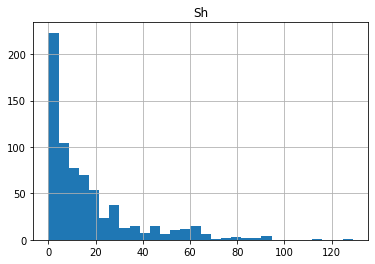

In [ ]:
df.hist(column='Sh',bins=30)

In [ ]:
df.Sh.value_counts(normalize=True)

0     0.164539
1     0.045390
2     0.039716
5     0.039716
6     0.038298
        ...   
50    0.001418
49    0.001418
46    0.001418
42    0.001418
39    0.001418
Name: Sh, Length: 79, dtype: float64